# I. Verðlagsþróun og verðbólguvæntingar (Dirty Demo) 

Í þessum kafla verður fjallað um verðlag og væntingar.

In [391]:
#Byrjum á því að sækja alla þá helstu pakka sem við þurfum.

import numpy as np
import pandas as pd
import requests
import datetime
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

#### I-1. Verðbólga 

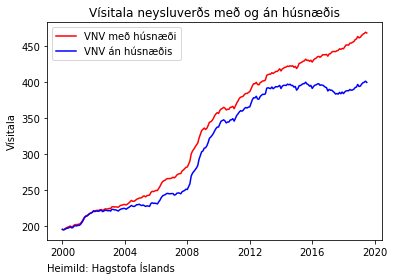

In [392]:
#Vísitala Neysluverðs með húsnæði (Red).
VNVT = requests.get("https://api.datahub.is/index/NEY/source/HS/value?from=2000-01-01").json()
VNV = pd.DataFrame.from_dict(VNVT)
VNV.date = pd.to_datetime(VNV.date)

#Vísitala Neysluverðs án húsnæðis (Blue).
VNVT2 = requests.get("https://api.datahub.is/index/NEY-H/source/HS/value?from=2000-01-01").json()
VNVH = pd.DataFrame.from_dict(VNVT2)
VNVH.date = pd.to_datetime(VNVH.date)

#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=VNV.date, y=VNV["value"], color="red", label="VNV með húsnæði")
sns.lineplot(x=VNVH.date, y=VNVH["value"], color="blue", label="VNV án húsnæðis")
plt.ylabel("Vísitala")
plt.xlabel("Heimild: Hagstofa Íslands", position=(0.19,0.1))
plt.title("Vísitala neysluverðs með og án húsnæðis")
plt.legend(loc="upper left")

plt.show()

#plt.savefig('VNV.png')

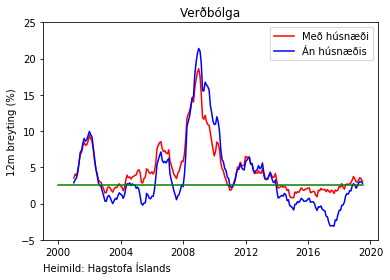

In [393]:
#Reiknum nú 12 mánaða prósentubreytingu á báðum vísitölunum.
VB = VNV["value"].pct_change(periods=12)*100
VBH = VNVH["value"].pct_change(periods=12)*100

#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=VNV.date, y=VB, color="red", label="Með húsnæði")
sns.lineplot(x=VNVH.date, y=VBH, color="blue", label="Án húsnæðis")
sns.lineplot(x=VNV.date, y=2.5, color="green")
plt.ylim(-5,25)
plt.ylabel("12m breyting (%)")
plt.xlabel("Heimild: Hagstofa Íslands", position=(0.19,0.1))
plt.title("Verðbólga")
plt.legend(loc="upper right")

plt.show()

#plt.savefig('VB.png')

#### I-2. Mæld og undirliggjandi verðbólga

Undirliggjandi verðbólga er mæld með kjarnavísitölu (áhrif óbeinna skatta, sveiflukenndra matvöruliða, bensíns, opinberrar þjónustu og raunvaxtakostnaðar húsnæðislána eru undanskilin) og tölfræðilegum mælikvörðum (vegið miðgildi, klippt meðaltal, kvikt þáttalíkan og sameiginlegur þáttur vísitölu neysluverðs).

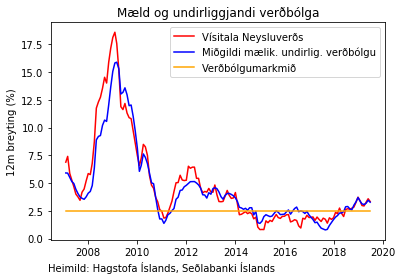

In [394]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I2 = pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I2.xlsx")

#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=I2["Date"], y=I2["VisitalaNeysluverds"], color="red", label="Vísitala Neysluverðs")
sns.lineplot(x=I2["Date"], y=I2["Midgildid"], color="blue", label="Miðgildi mælik. undirlig. verðbólgu")
sns.lineplot(x=I2["Date"], y=I2["VM"], color="orange", label="Verðbólgumarkmið")

plt.ylabel("12m breyting (%)")
plt.xlabel("Heimild: Hagstofa Íslands, Seðlabanki Íslands", position=(0.33,0.1))
plt.title("Mæld og undirliggjandi verðbólga")
plt.legend(loc="best")

plt.show()

#### I-3. Árstíðarleiðrétt verðbólga

Þessi mælikvarði á verðbólgu er afar sveiflukenndur en gefur vísbendingu um hvernig verðbólguþrýstingur er að þróast. Mánaðarlegar tölur.
Heimildir: Hagstofa Íslands, Seðlabanki Íslands.

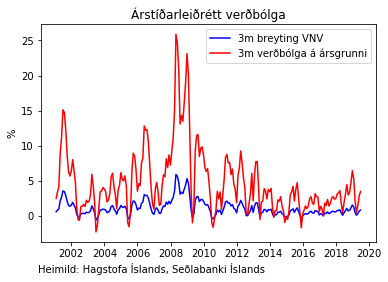

In [395]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I3= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I3.xlsx")

#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=I3["Date"], y=I3["3mVNV"], color="blue", label="3m breyting VNV")
sns.lineplot(x=I3["Date"], y=I3["3mVNVarsgrunnur"], color="red", label="3m verðbólga á ársgrunni")

plt.ylabel("%")
plt.xlabel("Heimild: Hagstofa Íslands, Seðlabanki Íslands", position=(0.33,0.1))
plt.title("Árstíðarleiðrétt verðbólga")
plt.legend(loc="best")

plt.show()

#### I-4. Undirliðir verðbólgu
Framlag til 12 mánaða verðbólgu. Mánaðarlegar tölur. Heimild: Hagstofa Íslands.

// Breyta við tækifæri í alvöru stacked barplots (https://randyzwitch.com/creating-stacked-bar-chart-seaborn/)

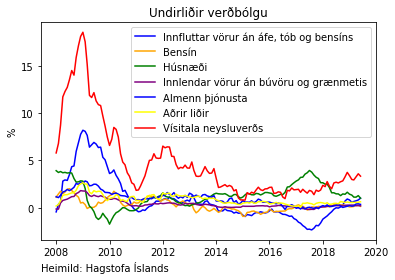

In [396]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I4= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I4.xlsx")

I4.head()

#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=I4["Date"], y=I4["Innflutt"], color="blue", label="Innfluttar vörur án áfe, tób og bensíns")
sns.lineplot(x=I4["Date"], y=I4["Bensin"], color="orange", label="Bensín")
sns.lineplot(x=I4["Date"], y=I4["Hus"], color="green", label="Húsnæði")
sns.lineplot(x=I4["Date"], y=I4["Innlent"], color="purple", label="Innlendar vörur án búvöru og grænmetis")
sns.lineplot(x=I4["Date"], y=I4["AlmennTh"], color="blue", label="Almenn þjónusta")
sns.lineplot(x=I4["Date"], y=I4["Annad"], color="yellow", label="Aðrir liðir")
sns.lineplot(x=I4["Date"], y=I4["VNV"], color="red", label="Vísitala neysluverðs")

plt.ylabel("%")
plt.xlabel("Heimild: Hagstofa Íslands", position=(0.19,0.1))
plt.title("Undirliðir verðbólgu")
plt.legend(loc="best")

plt.show()

#### I-5. Innlend og Innflutt verðbólga
Innflutt verðbólga er nálguð með innfluttri mat- og drykkjarvöru, verði nýrra bíla og varahluta, bensíns og annarrar innfluttrar vöru. Innlend verðbólga er nálguð með verði innlendrar vöru og verði almennrar og opinberrar þjónustu. Tölur í svigum sýna núverandi vægi viðkomandi liða í vísitölu neysluverðs. Mánaðarlegar tölur.
Heimildir: Hagstofa Íslands, Seðlabanki Íslands.

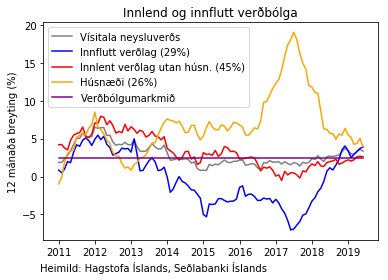

In [397]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I5= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I5.xlsx")

#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=I5["Date"], y=I5["VNV"], color="grey", label="Vísitala neysluverðs")
sns.lineplot(x=I5["Date"], y=I5["InnfluttVerd"], color="blue", label="Innflutt verðlag (29%)")
sns.lineplot(x=I5["Date"], y=I5["InnlentUtanHus"], color="red", label="Innlent verðlag utan húsn. (45%)")
sns.lineplot(x=I5["Date"], y=I5["Hus"], color="orange", label="Húsnæði (26%)")
sns.lineplot(x=I5["Date"], y=I5["VM"], color="purple", label="Verðbólgumarkmið")

plt.ylabel("12 mánaða breyting (%)")
plt.xlabel("Heimild: Hagstofa Íslands, Seðlabanki Íslands", position=(0.33,0.1))
plt.title("Innlend og innflutt verðbólga")
plt.legend(loc="best")

plt.show()

#### I-6. Framleiðslu- og smásöluverð innlendrar vöru
Mánaðarlegar tölur.
Heimildir: Hagstofa Íslands, Seðlabanki Íslands.

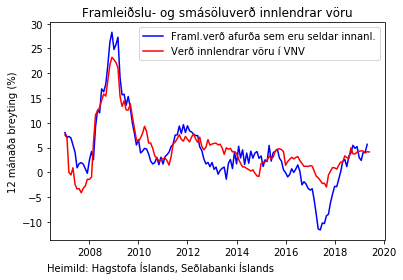

In [398]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I6= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I6.xlsx")


#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=I6["Date"], y=I6["FramVInnan"], color="blue", label="Framl.verð afurða sem eru seldar innanl.")
sns.lineplot(x=I6["Date"], y=I6["InnlentVNV"], color="red", label="Verð innlendrar vöru í VNV")


plt.ylabel("12 mánaða breyting (%)")
plt.xlabel("Heimild: Hagstofa Íslands, Seðlabanki Íslands", position=(0.33,0.1))
plt.title("Framleiðslu- og smásöluverð innlendrar vöru")
plt.legend(loc="best")

plt.show()

#### I-7. Verðlagsþróun: Húsnæði og þjónusta
Mánaðarlegar tölur. Heimild: Hagstofa Íslands.

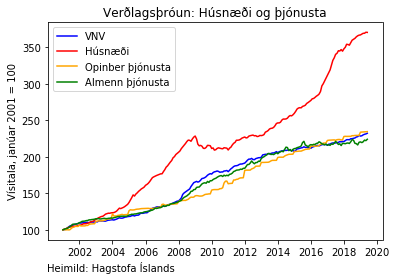

In [399]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I7= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I7.xlsx")

#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=I7["Date"], y=I7["VNV"], color="blue", label="VNV")
sns.lineplot(x=I7["Date"], y=I7["Hus"], color="red", label="Húsnæði")
sns.lineplot(x=I7["Date"], y=I7["OpinberÞjo"], color="orange", label="Opinber þjónusta")
sns.lineplot(x=I7["Date"], y=I7["AlmennÞjo"], color="green", label="Almenn þjónusta")


plt.ylabel("Vísitala, janúar 2001 = 100")
plt.xlabel("Heimild: Hagstofa Íslands", position=(0.19,0.1))
plt.title("Verðlagsþróun: Húsnæði og þjónusta")
plt.legend(loc="best")

plt.show()

#### I-8. Verðlagsþróun: Húsnæði
Greidd húsaleiga sýnir verðþróun á leigu íbúðarhúsnæðis. Reiknuð húsaleiga metur kostnað við búsetu í eigin húsnæði og breytist með markaðsverði húsnæðis og raunvöxtum á húsnæðislánum. Mánaðarlegar tölur.
Heimild: Hagstofa Íslands.

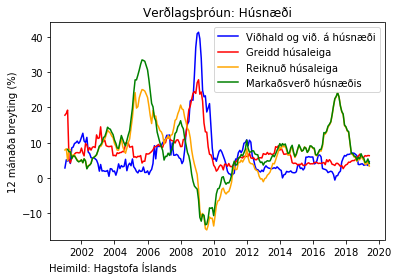

In [400]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I8= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I8.xlsx")

#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=I8["Date"], y=I8["Vidhald"], color="blue", label="Viðhald og við. á húsnæði")
sns.lineplot(x=I8["Date"], y=I8["GreiddLeiga"], color="red", label="Greidd húsaleiga")
sns.lineplot(x=I8["Date"], y=I8["ReiknudLeiga"], color="orange", label="Reiknuð húsaleiga")
sns.lineplot(x=I8["Date"], y=I8["Markadsverd"], color="green", label="Markaðsverð húsnæðis")

plt.ylabel("12 mánaða breyting (%)")
plt.xlabel("Heimild: Hagstofa Íslands", position=(0.19,0.1))
plt.title("Verðlagsþróun: Húsnæði")
plt.legend(loc="best")

plt.show()

#### I-9. Verðlagsþróun: Ýmsir undirliðir
Mánaðarlegar tölur.
Heimild: Hagstofa Íslands.

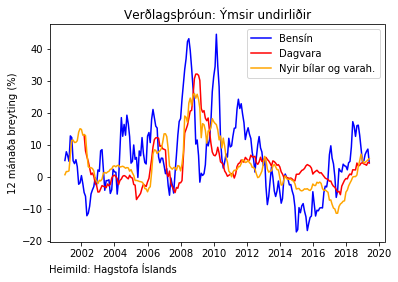

In [401]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I9= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I9.xlsx")

#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=I9["Date"], y=I9["Bensin"], color="blue", label="Bensín")
sns.lineplot(x=I9["Date"], y=I9["Dagvara"], color="red", label="Dagvara")
sns.lineplot(x=I9["Date"], y=I9["NyirBilarogVarah"], color="orange", label="Nyir bílar og varah.")

plt.ylabel("12 mánaða breyting (%)")
plt.xlabel("Heimild: Hagstofa Íslands", position=(0.19,0.1))
plt.title("Verðlagsþróun: Ýmsir undirliðir")
plt.legend(loc="best")

plt.show()

#### I-10. Verðlagsþróun: Laun og þjónusta
Mánaðarlegar tölur.
Heimild: Hagstofa Íslands.

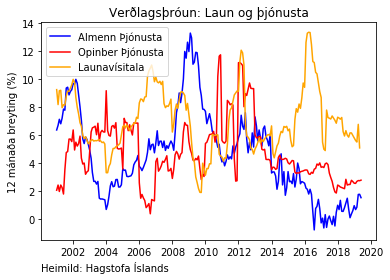

In [402]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I10= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I10.xlsx")

#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=I10["Date"], y=I10["AlmennThj"], color="blue", label="Almenn Þjónusta")
sns.lineplot(x=I10["Date"], y=I10["OpinberThj"], color="red", label="Opinber Þjónusta")
sns.lineplot(x=I10["Date"], y=I10["Launavisitala"], color="orange", label="Launavísitala")

plt.ylabel("12 mánaða breyting (%)")
plt.xlabel("Heimild: Hagstofa Íslands", position=(0.19,0.1))
plt.title("Verðlagsþróun: Laun og þjónusta")
plt.legend(loc="best")

plt.show()

#### I-11. Verðlagsþróun: Vörur, húsnæði og þjónusta
Mánaðarlegar tölur. Heimild: Hagstofa Íslands.

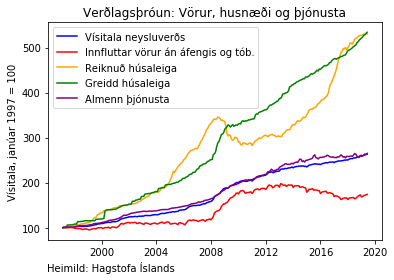

In [403]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I11= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I11.xlsx")


#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=I11["Date"], y=I11["VNV"], color="blue", label="Vísitala neysluverðs")
sns.lineplot(x=I11["Date"], y=I11["Innflutt"], color="red", label="Innfluttar vörur án áfengis og tób.")
sns.lineplot(x=I11["Date"], y=I11["Rhusaleiga"], color="orange", label="Reiknuð húsaleiga")
sns.lineplot(x=I11["Date"], y=I11["Ghusaleiga"], color="green", label="Greidd húsaleiga")
sns.lineplot(x=I11["Date"], y=I11["AlmennThj"], color="purple", label="Almenn þjónusta")


plt.ylabel("Vísitala, janúar 1997 = 100")
plt.xlabel("Heimild: Hagstofa Íslands", position=(0.19,0.1))
plt.title("Verðlagsþróun: Vörur, husnæði og þjónusta")
plt.legend(loc="best")

plt.show()

#### I-12. Dreifing verðhækkana vísitölu neysluverðs
Hlutfall vöruflokka sem hækka í verði er 3 mánaða miðsett meðaltal. Mánaðarlegar tölur.
Heimild: Hagstofa Íslands.

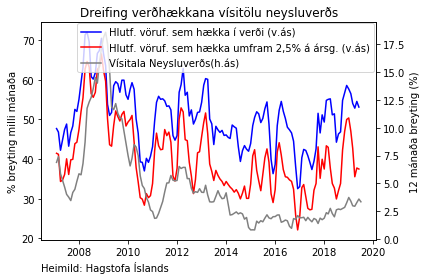

In [404]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I12= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I12.xlsx")

#Teiknum þetta nú upp með hjálp Matplotlib
x = I12["Date"]
y1 = I12["H1"]
y2 = I12["H2"]
y3 = I12["VNV"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'blue', label="Hlutf. vöruf. sem hækka í verði (v.ás)")
ax1.plot(x, y2, 'red', label="Hlutf. vöruf. sem hækka umfram 2,5% á ársg. (v.ás)")
ax2.plot(x, y3, 'grey', label="Vísitala Neysluverðs(h.ás)")

fig.legend(loc=(0.18,0.74))

ax1.set_xlabel("Heimild: Hagstofa Íslands", position=(0.19,0.1))
ax1.set_ylabel('% breyting milli mánaða')
ax2.set_ylabel('12 mánaða breyting (%)')

plt.title("Dreifing verðhækkana vísitölu neysluverðs")

plt.show()

#### I-13. Verðbólguálag á skuldabréfamarkaði
Verðbólguálagið er reiknað út frá mun á ávöxtunarkröfu óverðtryggðra og verðtryggðra ríkisskuldabréfa (5 daga hreyfanleg meðaltöl). Daglegar tölur. Heimild: Seðlabanki Íslands.

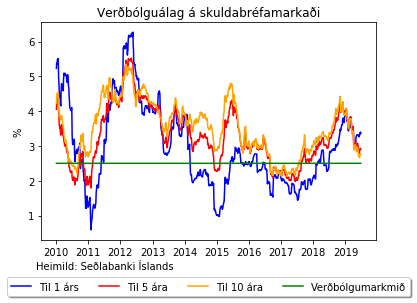

In [405]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I13= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I13.xlsx")

#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=I13["Date"], y=I13["VA1"], color="blue", label="Til 1 árs")
sns.lineplot(x=I13["Date"], y=I13["VA5"], color="red", label="Til 5 ára")
sns.lineplot(x=I13["Date"], y=I13["VA10"], color="orange", label="Til 10 ára")
sns.lineplot(x=I13["Date"], y=I13["VM"], color="green", label="Verðbólgumarkmið")

plt.ylabel("%")
plt.xlabel("Heimild: Seðlabanki Íslands", position=(0.19,0.1))
plt.title("Verðbólguálag á skuldabréfamarkaði")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=4)

plt.show()

#### I-14. Verðbólguvæntingar fyrirtækja, heimila og markaðsaðila til 1 árs
Verðbólguvæntingar skv. könnunum Gallup og Seðlabankans. Spurt er hver verðbólgan muni verða næstu 12 mánuði og notast er við miðgildi. Mælingar á verðbólguvæntingum fyrirtækja voru framkvæmdar óreglulega fram að þriðja ársfjórðungi 2006 og því er brúað á milli mælinga fram að því. Ársfjórðungslegar tölur.
Heimildir: Gallup, Hagstofa Íslands, Seðlabanki Íslands.

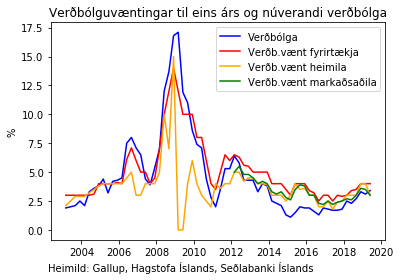

In [406]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I14= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I14.xlsx")

#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=I14["Date"], y=I14["Verdbolga"], color="blue", label="Verðbólga")
sns.lineplot(x=I14["Date"], y=I14["Vheimili"], color="red", label="Verðb.vænt fyrirtækja")
sns.lineplot(x=I14["Date"], y=I14["Vfyrirtaeki"], color="orange", label="Verðb.vænt heimila")
sns.lineplot(x=I14["Date"], y=I14["Vmarkadur"], color="green", label="Verðb.vænt markaðsaðila")

plt.ylabel("%")
plt.xlabel("Heimild: Gallup, Hagstofa Íslands, Seðlabanki Íslands", position=(0.39,0.1))
plt.title("Verðbólguvæntingar til eins árs og núverandi verðbólga")
plt.legend(loc="best")

plt.show()

#### I-15. Langtímaverðbólguvæntingar markaðsaðila, heimila og fyrirtækja
Verðbólguvæntingar skv. könnunum Gallup og Seðlabankans. Spurt er hver verðbólgan verði að meðaltali á næstu 5/10 árum og notast er við miðgildi. Ársfjórðungslegar tölur.
Heimildir: Gallup, Hagstofa Íslands, Seðlabanki Íslands.

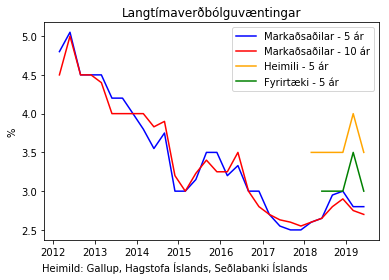

In [407]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I15= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I15.xlsx")

I15.head()

#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=I15["Date"], y=I15["M5ar"], color="blue", label="Markaðsaðilar - 5 ár")
sns.lineplot(x=I15["Date"], y=I15["M10ar"], color="red", label="Markaðsaðilar - 10 ár")
sns.lineplot(x=I15["Date"], y=I15["H5ar"], color="orange", label="Heimili - 5 ár")
sns.lineplot(x=I15["Date"], y=I15["F5ar"], color="green", label="Fyrirtæki - 5 ár")

plt.ylabel("%")
plt.xlabel("Heimild: Gallup, Hagstofa Íslands, Seðlabanki Íslands", position=(0.39,0.1))
plt.title("Langtímaverðbólguvæntingar")
plt.legend(loc="best")

plt.show()

#### I-16. Innflutningsverðlag og gengisþróun
Vöruskiptavegin innflutningsgengisvísitala og verð innfluttrar vöru án áfengis og tóbaks í vísitölu neysluverðs. Verðvísitala útflutnings helstu viðskiptalanda er vegin með innflutningsvog þröngrar viðskiptavogar og byggist nýjasta gildi hennar á nýjustu grunnspá Seðlabankans. Ársfjórðungslegar tölur.
Heimildir: Hagstofa Íslands, Seðlabanki Íslands.

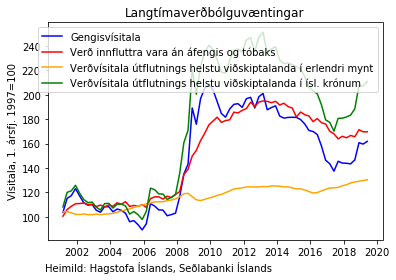

In [408]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I16= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I16.xlsx")

#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=I16["Date"], y=I16["Gengisvis"], color="blue", label="Gengisvísitala")
sns.lineplot(x=I16["Date"], y=I16["Inn"], color="red", label="Verð innfluttra vara án áfengis og tóbaks")
sns.lineplot(x=I16["Date"], y=I16["Ut"], color="orange", label="Verðvísitala útflutnings helstu viðskiptalanda í erlendri mynt")
sns.lineplot(x=I16["Date"], y=I16["Ut2"], color="green", label="Verðvísitala útflutnings helstu viðskiptalanda í ísl. krónum")

plt.ylabel("Vísitala, 1. ársfj. 1997=100")
plt.xlabel("Heimild: Hagstofa Íslands, Seðlabanki Íslands", position=(0.33,0.1))
plt.title("Langtímaverðbólguvæntingar")
plt.legend(loc="best")

plt.show()

#### I-17. Verðbólga og gengi krónu
Gengi er vísitala meðalgengis miðað við þrönga viðskiptavog. Ársfjórðungslegar tölur.
Heimildir: Hagstofa Íslands, Seðlabanki Íslands.

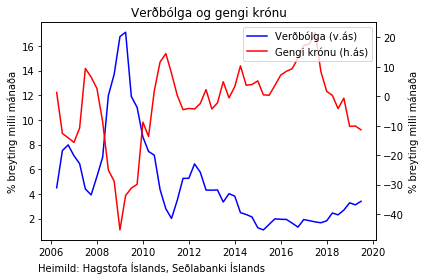

In [409]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I17= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I17.xlsx")

x = I17["Date"]
y1 = I17["Verdbolga"]
y2 = y=I17["Gengi"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'blue', label="Verðbólga (v.ás)")
ax2.plot(x, y2, 'red', label="Gengi krónu (h.ás)")

fig.legend(loc=(0.57,0.78))

ax1.set_xlabel("Heimild: Hagstofa Íslands, Seðlabanki Íslands", position=(0.33,0.1))
ax1.set_ylabel('% breyting milli mánaða')
ax2.set_ylabel('% breyting milli mánaða')

plt.title("Verðbólga og gengi krónu")

plt.show()

#### I-18. Verðlags- og gengisþróun
Vísitala meðalgengis miðað við þrönga viðskiptavog. Mánaðarlegar tölur. Heimildir: Hagstofa Íslands, Seðlabanki Íslands


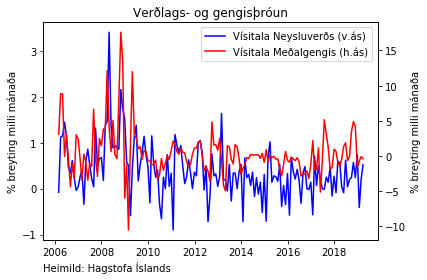

In [410]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I18= pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I18.xlsx")

x = I18["Date"]
y1 = I18["VisitalaNeysluverds"]
y2 = y=I18["VisitalaMedalgengis"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'blue', label="Vísitala Neysluverðs (v.ás)")
ax2.plot(x, y2, 'red', label="Vísitala Meðalgengis (h.ás)")

fig.legend(loc=(0.47,0.78))

ax1.set_xlabel("Heimild: Hagstofa Íslands", position=(0.19,0.1))
ax1.set_ylabel('% breyting milli mánaða')
ax2.set_ylabel('% breyting milli mánaða')

plt.title("Verðlags- og gengisþróun")

plt.show()

#### I-19. Verðbólga á Íslandi, í Evrópu
Samræmd vísitala neysluverðs. Mánaðarlegar tölur. 12 mánaða breyting (%). Heimild: Hagstofa Íslands.

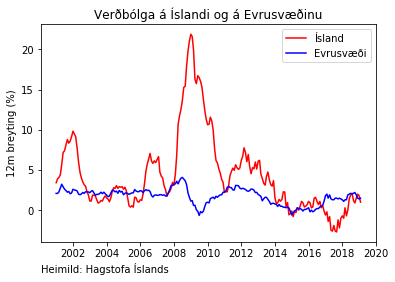

In [411]:
#Sækjum fyrst öll mánaðarlegu gögnin í grunn sem nefnist K1_M.
I19 = pd.read_excel("/Users/Gudmundsson/Code/RSQ/RSQ1.0/Data/K1Verðlagsþróun/I19.xlsx")

#Teiknum þetta nú upp með hjálp Seaborn.
sns.lineplot(x=I19["Date"], y=I19["Island"], color="red", label="Ísland")
sns.lineplot(x=I19["Date"], y=I19["Evrusvaedi"], color="blue", label="Evrusvæði")
plt.ylabel("12m breyting (%)")
plt.xlabel("Heimild: Hagstofa Íslands", position=(0.19,0.1))
plt.title("Verðbólga á Íslandi og á Evrusvæðinu")
plt.legend(loc="best")

plt.show()